In [16]:
## Categorize and predict

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [86]:
df = df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [87]:
# Assuming you have a DataFrame df with a column named 'area'
bins = [0, 3, 15, 1100.00]
labels = ['small', 'medium', 'large']

# Add a new column 'area_size' with the size information
df['severity'] = pd.cut(df['area'], bins=bins, labels=labels, include_lowest=True)

df = df.drop(columns='area')
# If you want to directly replace the values in the 'area' column:
# df['area'] = pd.cut(df['area'], bins=bins, labels=labels, include_lowest=True)

print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain severity
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0    small
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0    small
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0    small
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2    small
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0    small
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...      ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   medium
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0    large
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   medium
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0    small
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0    small

[517 rows x 13 columns]


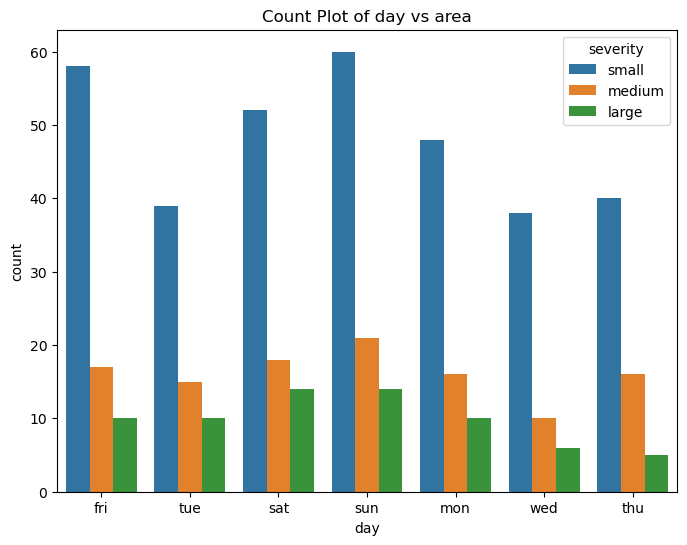

In [88]:
# importing packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='day', hue='severity', data=df)
plt.title('Count Plot of day vs area')
plt.show()

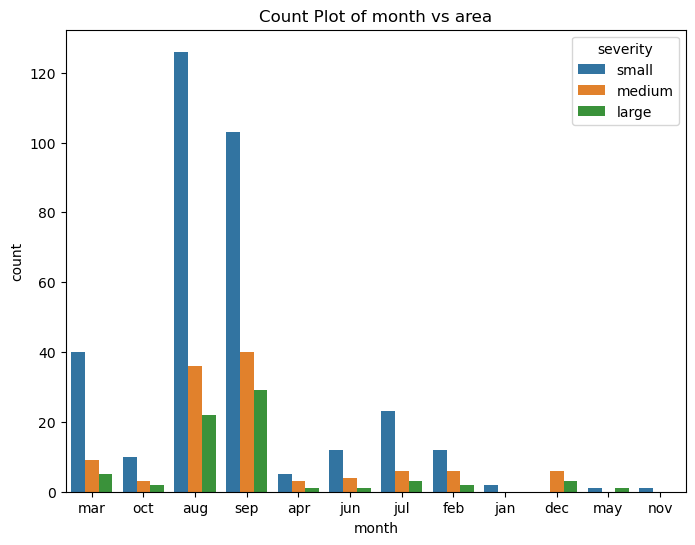

In [89]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='month', hue='severity', data=df)
plt.title('Count Plot of month vs area')
plt.show()

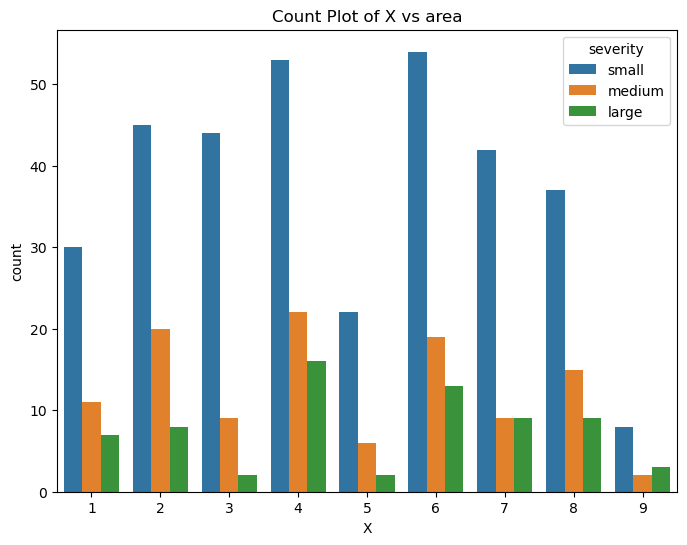

In [105]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='X', hue='severity', data=df)
plt.title('Count Plot of X vs area')
plt.show()

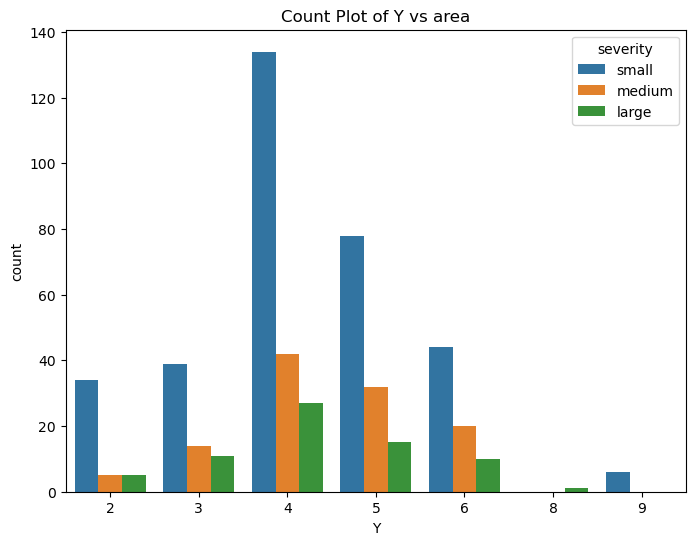

In [106]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', hue='severity', data=df)
plt.title('Count Plot of Y vs area')
plt.show()

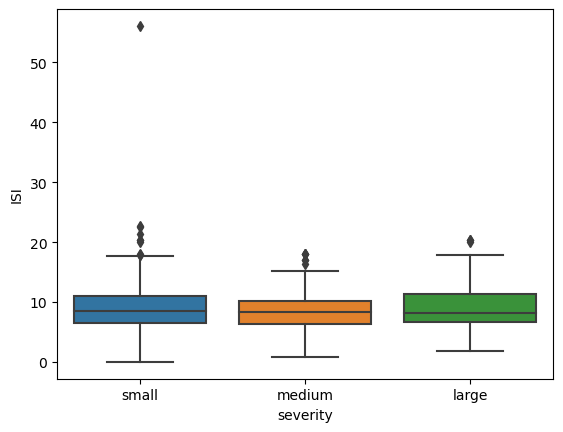

In [90]:
# Create a box plot
sns.boxplot(x='severity', y='ISI', data=df)
plt.show()

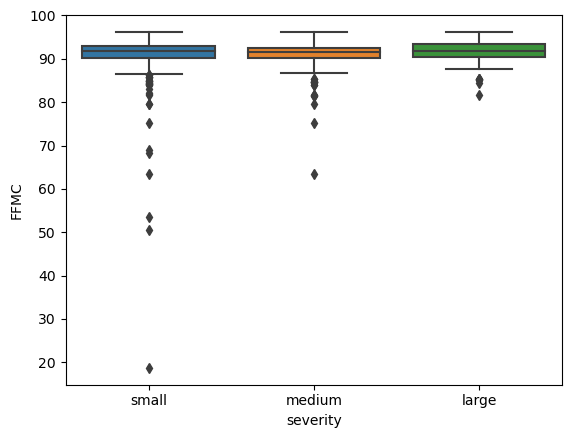

In [91]:
sns.boxplot(x='severity', y='FFMC', data=df)
plt.show()

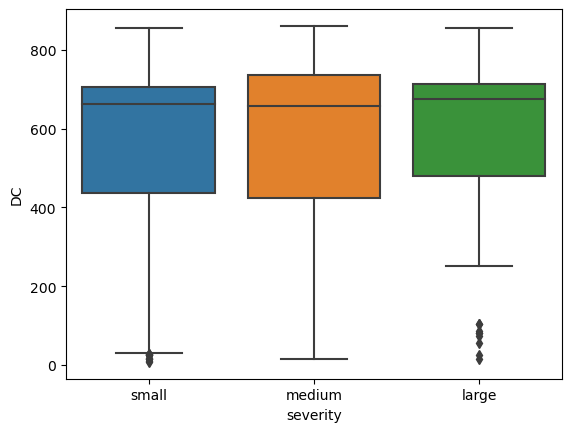

In [92]:
sns.boxplot(x='severity', y='DC', data=df)
plt.show()

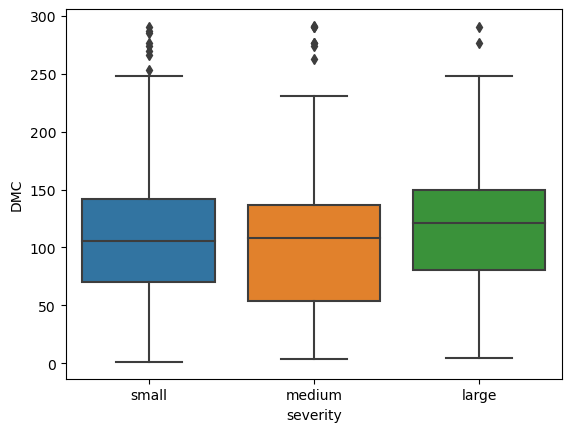

In [93]:
sns.boxplot(x='severity', y='DMC', data=df)
plt.show()

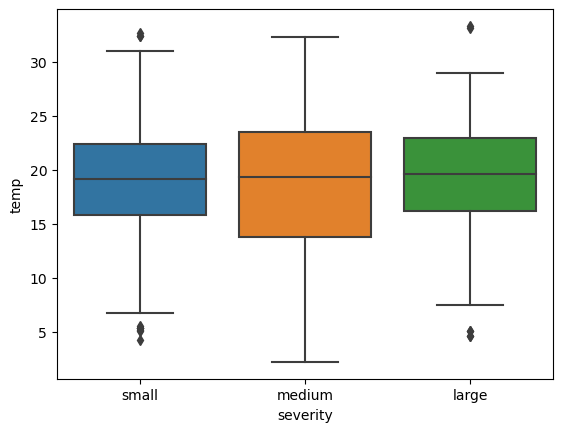

In [107]:
sns.boxplot(x='severity', y='temp', data=df)
plt.show()

In [95]:
# Getting the dummy variables
month_dummies = pd.get_dummies(df['month'], prefix='month', drop_first=True, dtype=int)
month_dummies
day_dummies = pd.get_dummies(df['day'], prefix='day', drop_first=True, dtype=int)
day_dummies

,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
512,0,0,1,0,0,0
513,0,0,1,0,0,0
514,0,0,1,0,0,0
515,0,1,0,0,0,0


In [96]:
# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df, month_dummies, day_dummies], axis=1)
df1 = df1.drop(columns=['month','day'])
df1

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
X1 = df1.drop(columns=['severity']) # All except last 1
Y = df1['severity'] # Just the last one - dependent
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 517 entries, 0 to 516
Series name: severity
Non-Null Count  Dtype   
--------------  -----   
517 non-null    category
dtypes: category(1)
memory usage: 781.0 bytes


In [98]:
large_area_count = df[df['severity'] == 'large'].shape[0]
print("Number of rows with large area size:", large_area_count)

Number of rows with large area size: 69


In [109]:
#your code
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.3, random_state=746)


In [110]:
#your code
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=746)
# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[ 3  1 16]
 [ 1  3 35]
 [ 1  8 88]]

Classification Report:
              precision    recall  f1-score   support

       large       0.60      0.15      0.24        20
      medium       0.25      0.08      0.12        39
       small       0.63      0.91      0.75        97

    accuracy                           0.60       156
   macro avg       0.49      0.38      0.37       156
weighted avg       0.53      0.60      0.52       156



In [101]:
#your code
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
svm_model = svm.SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 0  1 19]
 [ 0  1 38]
 [ 0  1 96]]

Classification Report:
              precision    recall  f1-score   support

       large       0.00      0.00      0.00        20
      medium       0.33      0.03      0.05        39
       small       0.63      0.99      0.77        97

    accuracy                           0.62       156
   macro avg       0.32      0.34      0.27       156
weighted avg       0.47      0.62      0.49       156



/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
from sklearn.naive_bayes import GaussianNB
#your code
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = nb_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 1  0 19]
 [ 1  0 38]
 [ 0  0 97]]

Classification Report:
              precision    recall  f1-score   support

       large       0.50      0.05      0.09        20
      medium       0.00      0.00      0.00        39
       small       0.63      1.00      0.77        97

    accuracy                           0.63       156
   macro avg       0.38      0.35      0.29       156
weighted avg       0.46      0.63      0.49       156



/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


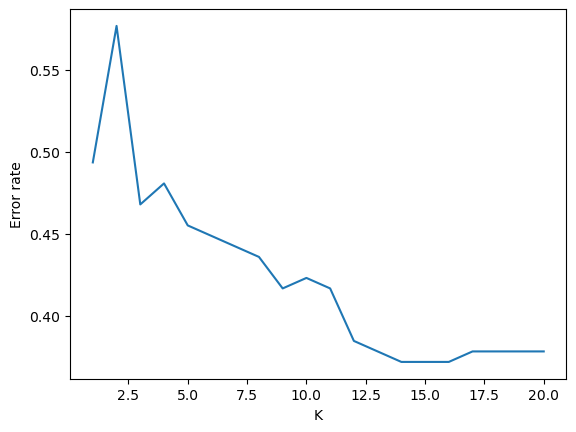

In [103]:
#your code
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Looking for the best k value
k_values = range(1, 21)

# Train the model for each value of K
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

# Plot the error rates
plt.plot(k_values, error_rates)
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()


In [104]:
# Use the k nearest neighbor
knn_classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 0  2 18]
 [ 0  1 38]
 [ 0  2 95]]

Classification Report:
              precision    recall  f1-score   support

       large       0.00      0.00      0.00        20
      medium       0.20      0.03      0.05        39
       small       0.63      0.98      0.77        97

    accuracy                           0.62       156
   macro avg       0.28      0.34      0.27       156
weighted avg       0.44      0.62      0.49       156



/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshaypaluri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
